## Fluid flow model of the queue for shelter and housing
Here we ignore the randomness in the arrival process and the service process for homeless people entering and leaving the homeless response system. Instead we assume that ``fluid" flows into the system continuously at a rate $\lambda(t)$ and flows out a  rate $\mu(t) = \mu_{0}n_{h}(t)$ where $\mu_{0}$ is the service rate of a single housing unit and $n_{h}(t)$ is the number of houses at time $t$. The simplification of the service process relies on the assumption that the servers are always busy. Given a house building rate of $h(t)$, we can calculate $n_{h}(t)$ as: 

$n_h(t) = n_{h0} + \int_{0}^{t} h(t) dt$

where $n_{h0}$ is the initial number of houses in the system. At time $t$ we can calculate the number of people $X(t)$ in the system as:

$X(t) = X_0 + \int_{0}^{t} \lambda(t) dt - \int_{0}^{t} \mu(t) dt$.

We split the queue for housing into an unsheltered and a sheltered part. We denote $n_{s}(t)$ as the number of shelters at time $t$. Given a server building rate of $s(t)$ and and initial number of shelters in the system $n_{s0}$ we can calculate $n_{s}(t)$ as:

$n_s(t) = n_{s0} + \int_{0}^{t} s(t) dt$. 

The size of the unsheltered queue at time $t$ is then: 

$unsh(t) = X(t) - n_h(t) - n_s(t) = X_0 + \int_{0}^{t} \lambda(t) dt - \int_{0}^{t} \mu(t) dt - n_h(t) - n_s(t)$

where we assume that build rates $h(t)$ and $s(t)$ are sufficiently small for the given arrival rate $\lambda(t)$ so that the expression above for $unsh(t)$ never drops below $0$. The purpose of this assumption is to ensure that an objective function which includes $unsh(t)$ does not involve an expression containing a maximisation (e.g. $\max(0,X(t)-n_h(t)-n_s(t))$). 

We can use this deterministic model to estimate statistical variability using: 

$E[unsh(t)] = X_0 + \int_{0}^{t} \lambda(t) dt - \int_{0}^{t} \mu(t) dt - n_h(t) - n_s(t)$

$Var[unsh(t)] = \int_{0}^{t} \lambda(t) dt + \int_{0}^{t} \mu(t) dt$

where the latter expression assumes exponential inter-arrival and service times. The above expressions can then help us calculate squared queue lengths: 

$E[unsh(t)^2] = E[unsh(t)]^2 + Var[unsh(t)]$. 

## Worked example
We start with a time horizon $T=4\text{ years}$

We set an arrival rate $\lambda(t)$ which is a step function, taking a single value from $\mathbb{R}^+$ each year. We can denote $\lambda(t)$ as a $T$-dimensional vector $\lambda(t) = \boldsymbol{\lambda} = \{\lambda_1, \lambda_2, \lambda_3, \lambda_4\} = \{1.25, 2.75, 0.5, 2\}$. 

We illustrate $\lambda(t)$ in the chart below. 

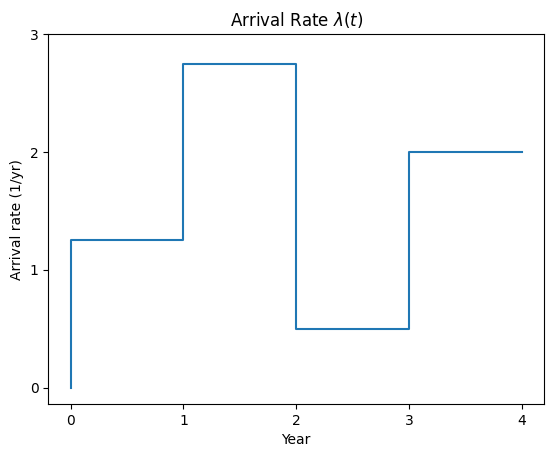

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Data
t = [0,1,2,3,4]
lmbda = [0,1.25,2.75,0.5,2]

# Step chart
fig, ax = plt.subplots()
ax.step(t, lmbda, where = 'pre')
ax.set_xlabel('Year')
ax.set_ylabel('Arrival rate (1/yr)')
ax.set_xticks(t)
ax.set_yticks([0,1,2,3])
ax.set_title('Arrival Rate $\lambda(t)$')
plt.show() 

Let $A(t)$ be the number of arrivals by time $t$, which can be given by: 

$A(t) = \int_{0}^{t} \lambda(t) dt$

which we illustrate in the chart below for our worked example

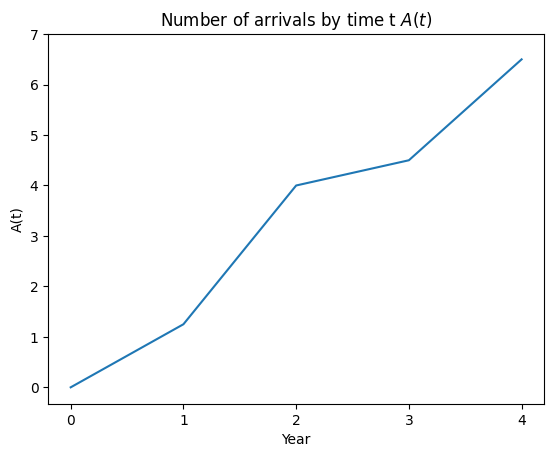

In [2]:
# Data
a = list(np.cumsum(np.array(lmbda)))

# Line chart
fig, ax = plt.subplots()
ax.plot(t, a)
ax.set_xlabel('Year')
ax.set_ylabel('A(t)')
ax.set_xticks(t)
ax.set_yticks([i for i in range(math.ceil(a[len(a)-1])+1)])
ax.set_title('Number of arrivals by time t $A(t)$')
plt.show()

We now set house building function $h(t)$ which is also a step function, taking a single value from $\mathbb{R}^+$ each year. We can denote $h(t)$ as a $T$-dimensional vector $h(t) = \boldsymbol{\h} = \{h_1,h_2,h_3,h_4\} = \{1, 1.5, 0.25, 2\}. 

We illustrate $h(t)$ in the chart below. 

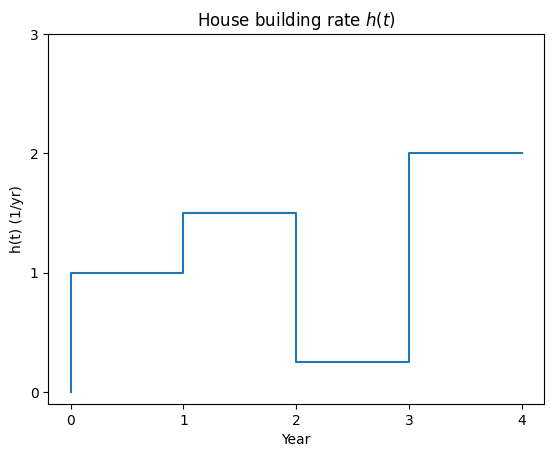

In [3]:
# Data
h = [0,1,1.5,0.25,2]

# Step chart
fig, ax = plt.subplots()
ax.step(t, h, where = 'pre')
ax.set_xlabel('Year')
ax.set_ylabel('h(t) (1/yr)')
ax.set_xticks(t)
ax.set_yticks([0,1,2,3])
ax.set_title('House building rate $h(t)$')
plt.show() 

We now calculate $n_h(t)$, the number of houses at time $t$ as follows: 

$n_h(t) = n_{h0} + \int_{0}^{t} h(t) dt$

We set $n_{h0}$ = 1. 

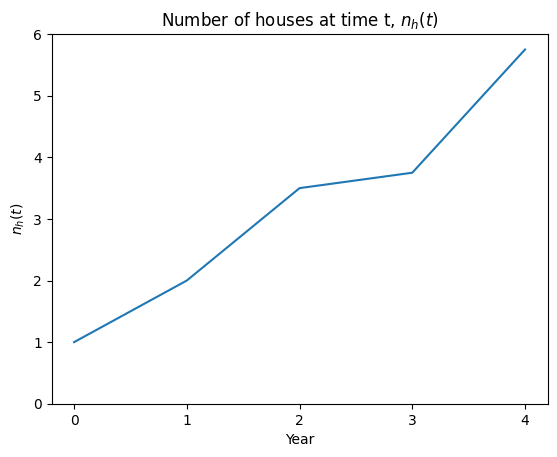

In [4]:
# Data
nh0 = 1
nh = list(np.cumsum(np.array(h)))
nh = [i+nh0 for i in nh]

# Line chart
fig, ax = plt.subplots()
ax.plot(t, nh)
ax.set_xlabel('Year')
ax.set_ylabel('$n_h(t)$')
ax.set_xticks(t)
ax.set_yticks([i for i in range(math.ceil(nh[len(nh)-1])+1)])
ax.set_title('Number of houses at time t, $n_h(t)$')
plt.show() 

For simplicity we set the service rate at a single house $\mu_0=1$, so we have $\mu_t = \mu_0 n_h(t) = n_h(t)$. We then calculate the number of departures from the system (service completions) by time $t$ as: 

$D(t) = \int_{0}^{t} \mu(t) dt$

which we illustrate in the chart below for our worked example:


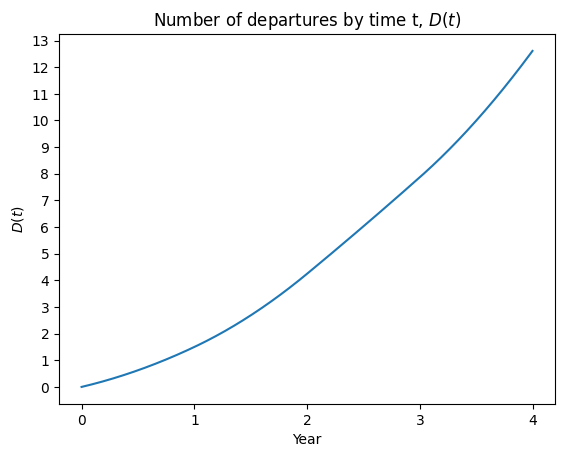

In [5]:
# Data
def D(h,t):
    # init
    d = 0
    
    # add complete years
    yrs = math.floor(t) # number of years passed
    for yr in range(yrs):
        d += (nh0 + sum([h[i] for i in range(yr)]) + h[yr]/2)
            
    # add fractional year
    d += (t % 1) * (nh0 + sum([h[i] for i in range(yrs)]) + (t % 1) * h[yrs]/2)

    return(d)

T = len(t)-1
stepsize = 365
T = [i/stepsize for i in range(int(T*stepsize))]
d = [D(h[1:len(h)],t) for t in T]

# Line chart
fig, ax = plt.subplots()
ax.plot(T, d)
ax.set_xlabel('Year')
ax.set_ylabel('$D(t)$')
ax.set_xticks(t)
ax.set_yticks([i for i in range(math.ceil(d[len(d)-1])+1)])
ax.set_title('Number of departures by time t, $D(t)$')
plt.show() 


This gives us information on the Expected number of arrivals and departures by time $t$. As discussed previuosly, we can use this information to calculate the number of people $X(t)$ in the system at time $t$.

$X(t) = X_0 + A(t) - D(t) = X_0 + \int_{0}^{t} \lambda(t) dt - \int_{0}^{t} \mu(t) dt$.

## Deterministic optimisation using fluid flow model

The fluid flow model has the advantages that:

* it is simple
* it is quick to run 
* it accepts building rates from the set of non-negative real numbers (useful in a continuous optimisation framework). 

We now use this fluid flow model to compute deterministic objective values in an continuous optimisation formulation. We will solve this continuous problem using Pyomo which is able to solve problems with 'black-box' objective functions. Note: we solved a discrete version of this problem previously using the analytical $M(t)/M/s(t)$ queueing model and a complete enumeration of the feasible region. 

In [6]:
import fluid_flow_model as fl
import json
import matplotlib.pyplot as plt

# Opening JSON file
with open('data_as_is_exp1.json') as json_file:
    data_as_is_exp1 = json.load(json_file)

print('Length of model run (yrs): ' + str(data_as_is_exp1['analysis_horizon']))
print('Initial capacity: ' + str(data_as_is_exp1['initial_capacity']))
print('Initial demand: ' + str(data_as_is_exp1['initial_demand']))
for i in range(len(data_as_is_exp1['arrival_rates'])):
    print('Arrival rates yr ' + str(i+1) + ': ' + str(data_as_is_exp1['arrival_rates'][i]))

Length of model run (yrs): 4
Initial capacity: {'housing': 40, 'shelter': 15}
Initial demand: 180
Arrival rates yr 1: 100
Arrival rates yr 2: 100
Arrival rates yr 3: 100
Arrival rates yr 4: 100


Let $\mu_0$ be the housing service rate for a single housing unit. 

Let $T \in Z^{+}$ be a fixed horizon over which to model queue behaviour and to make building decisions.

Let vectors $\boldsymbol{h} = \{h_t \hspace{0.2cm} \forall t \in {1,...,T}\}$ and $\boldsymbol{s} = \{s_t \hspace{0.2cm} \forall t \in {1,...,T}\}$ denote annual house and shelter building rates, respectively. For simplicity we say that housing/shelter building rates are constant within each year. 

Let $c_{h} = 1$ be the cost of increasing $h_t$ by one, for any $t$.

Let $c_{s}$ be the cost of increasing $s_t$ by one, for any $t$. 

Let $y(\boldsymbol{h},\boldsymbol{s})$ be a deterministic objective function, evaluated using the fluid flow model. 

Let $B$ be a baseline minimum annual house/shetler building rate

Let $C$ be a total budget for building housing and shelter

#### Optimisation formulation

$\min_{\boldsymbol{h},\boldsymbol{s}} \hspace{0.2cm} y(\boldsymbol{h},\boldsymbol{s})$

$\text{ s.t.} \hspace{0.8cm} \sum_{t=1}^{T} c_{h}h_{t} + c_{s}s_{t} \leq C$

$\hspace{1.6cm} h_t, s_t \geq B \hspace{0.2cm} \forall t \in \{1, ..., T\}$

As an example, we set the objective function to be the time average of the expected value of the unsheltered queue: 

$y(\boldsymbol{h},\boldsymbol{s}) = \frac{1}{T} \int_0^T E[unsh(t; \boldsymbol{h},\boldsymbol{s})] dt$

We set: 

$\mu_0 = 0.25$

$T=4$

$c_s = 0.5$

$B=12$

$C = B (c_h + c_s) T + 60$. 

This value of $C$ allows an extra budget of $60$ to be spent at any time on either shelter or housing. This could, for example, afford an extra build rate of $60$ houses/yr or $120$ shelters/yr in a specific year, or some mixture of extra housing and extra shelter.

#### Optimal solution

House building solution per year: $[12.0, 12.0, 12.0, 12.0]$

Shelter building solution per year: $[132.0, 12.0, 12.0, 12.0]$

Optimal objective Val: $144.0$

Note: the problem was solved by running the `deterministic_optimisation.py' script in this GitHub repository. 

As expected, the extra budget is all spent in the first year. Here the preference is for extra shelter. If we increase the housing service rate from $\mu_0 = 0.25$, then at approx. $\mu_0 = 0.65$, the preference ``flips" to a preference for all the extra budget to be spent on extra housing in year one. This aligns with what we expect given our previous study of the discrete version of this model using the analytical M(t)/M/s(t) model. 

#### Further work

* Explore different objective functions, including squared Q lengths and the size of the sheltered Q. Incorporating the size of the sheltered Q into this formulation requires some thought since this value is bounded by the number of shelter units there are at any time $t$. 
* Objective functions could also include different weights for Q lengths at different points in the future. 
* Shape constraints to enforce an monotonically increasing housing build rate and a unimodal shelter build rate